## NSF Proposal 2016 ##

Goals
* Halpha imaging of $\log(M*) > 8$ filament galaxies
* Analysis of WISE sizes

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile='/Users/rfinn/research/NSA/nsa_v0_1_2_wise.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile='/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits'
jmass=fits.getdata(massfile)

In [54]:
# select galaxies near Virgo
raflag = (nsa.RA > 120.) & (nsa.RA < 240.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.Z*3.e5 > 1000.) & (nsa.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

wiseflag = (wise.W4MPRO > 0.1) & (wise.W3SNR > 5.)

## Match to Francoise's CO Tables ##

In [55]:
co10 = np.recfromcsv('/Users/rfinn/proposals/NSF2016/all-co10.tab',delimiter='')
co = np.recfromcsv('/Users/rfinn/proposals/NSF2016/CO-observed.list',delimiter='')

In [56]:
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co['ra']*u.degree,co['dec']*u.degree,frame='icrs')

# match CO catalog to NSA
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)

In [57]:
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co10.dtype)
matchedCO10[COflag] = co10[index[COflag]]
print len(COflag), sum(COflag)

print 'CO data',co['ra'][index[COflag]]

145155 40
CO data [ 207.1882  207.1625  208.0408  207.4348  207.5849  208.2579  208.1036
  207.2337  207.8557  208.34    202.2073  202.0419  202.1402  202.1383
  210.3501  209.9622  209.9879  200.7353  198.6275  209.2333  208.3243
  196.4482  200.7317  197.1428  198.1741  198.0278  200.7536  193.6692
  206.1183  206.2863  206.5986  207.1625  207.7112  208.4979  194.4581
  197.9043  204.605   206.3299  208.9164  210.1042]


In [ ]:
COdetection =  matchedCO10['area'] > .01
print sum(COdetection)

## RA and Dec color coded by recession velocity ##

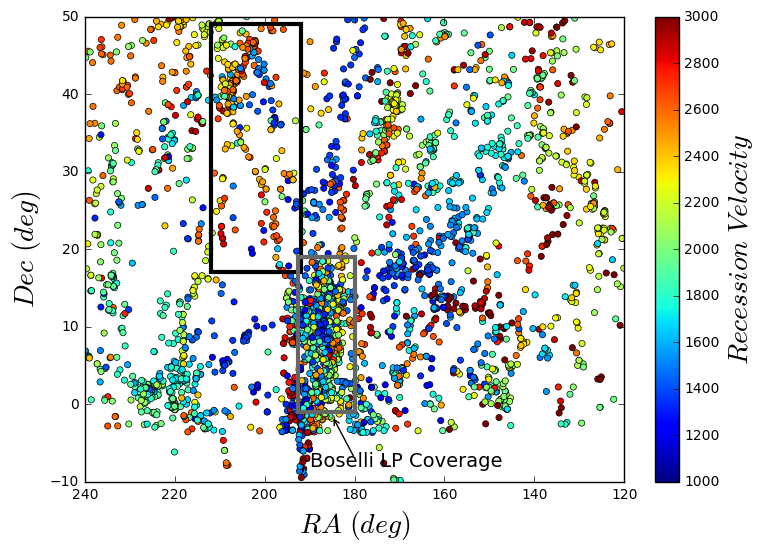

In [5]:
fig=plt.figure(figsize=(8,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
fig.gca().add_artist(rect)

# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20

# EVCC rectangle
#ra_min=175
#dec_min=-5
#dra=25
#ddec=30
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
plt.text(190,-8,'Boselli LP Coverage',fontsize=14,color='k')
#plt.arrow(180, -7, -5., 5, head_width=1, head_length=1, fc='k', ec='k')
#cb=plt.colorbar(fraction=.08)
plt.gca().annotate("", xy=(185, -1.5), xytext=(180, -7),arrowprops=dict(arrowstyle="->"))
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions_NSF.png')

## Galaxies in the Filament ##

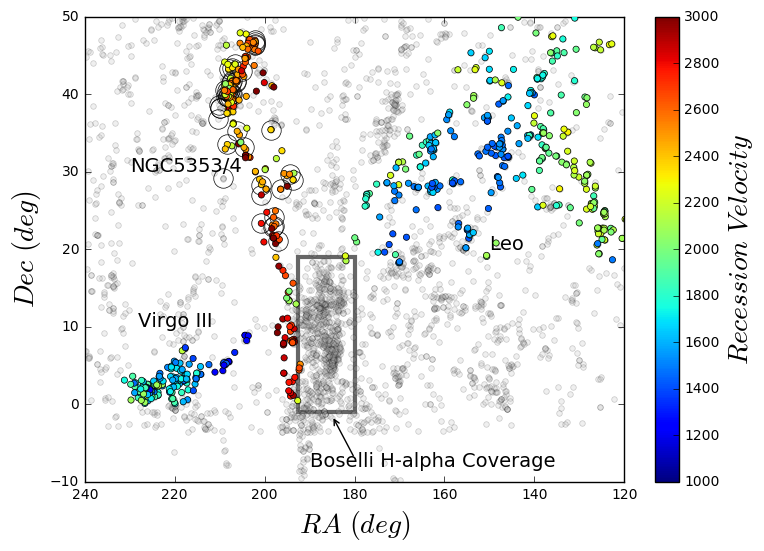

In [25]:
# color coded by recession velocity



fig=plt.figure(figsize=(8,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.7',markersize=4,alpha=0.2)

# NGC5353/4 Filament
radec = (nsa.RA > 192.) & (nsa.RA < 209) & (nsa.DEC > 0.) & (nsa.DEC < 50.) 
radec_flag = radec & (nsa.DEC >(2*(nsa.RA - 205.) + 20) ) & (nsa.DEC < (2*(nsa.RA - 205.) + 55))
filament = radec_flag & (nsa.Z*3.e5 >2000.) & (nsa.Z*3.e5 < 3238.)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=nsa.Z[filament]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(196,230,100)
yl = (2*(xl - 205.) + 20)
#plt.plot(xl,yl,'r-')
NGCfilament = filament

yl = (1.8*(xl - 205.) + 50)
#plt.plot(xl,yl,'r-')

# Kim Canes Venatici Filament
radec_vflag = (nsa.DEC >= 30.) * (nsa.DEC < 45.) * (nsa.RA > 190) & (nsa.RA < 204) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1100) *  (nsa.Z*3.e5 <= 1400)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)
CVfilament = filament3

# filament 3 - this does not correspond to one of the filaments in Kim+2016
radec_vflag = (nsa.DEC >= 25.) * (nsa.RA < 185) * (nsa.DEC > -0.8 * nsa.RA + 170.) 
filament3 = radec_vflag * (nsa.Z*3.e5 >=  1500) *  (nsa.Z*3.e5 <= 2300)
#plt.scatter(nsa.RA[filament3],nsa.DEC[filament3],c=nsa.Z[filament3]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=.5)


# filament - Leo Filaments
radec_vflag = (nsa.DEC >= 18.) * (nsa.RA < 185.) * (nsa.DEC <= -0.8 * nsa.RA + 170.) 
filament4 = radec_vflag * (nsa.Z*3.e5 >=  1400) *  (nsa.Z*3.e5 <= 2300)
plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)

LEOfilament = filament4
# Virgo III Filament
radec_vflag = (nsa.RA < 232.) & (nsa.RA > 203)& (nsa.DEC >= 0.) & (nsa.DEC < 9.) 
radec = radec_vflag & (nsa.DEC < (-.2*(nsa.RA - 220.) + 7))
filament4 = radec & (nsa.Z*3.e5 >=  1200) &  (nsa.Z*3.e5 <= 2190)
plt.scatter(nsa.RA[filament4],nsa.DEC[filament4],c=nsa.Z[filament4]*3.e5,zorder=20,s=20,vmin=1000,vmax=3000,lw=0.5)
xl = np.linspace(190,230,100)
yl = (-.2*(xl - 220.) + 7)
#plt.plot(xl,yl,'r-')
V3filament = filament4

#allfilaments = NGCfilament | CVfilament | LEOfilament | V3filament

allfilaments = NGCfilament | CVfilament  | V3filament | LEOfilament

halphafilaments = NGCfilament | LEOfilament

# label filaments

plt.text(205,30,'NGC5353/4',fontsize=14,horizontalalignment='right')
#plt.text(200,45,'Canes Venatici',fontsize=14,horizontalalignment='left')
plt.text(220,10,'Virgo III',fontsize=14,horizontalalignment='center')
plt.text(150,20,'Leo',fontsize=14,horizontalalignment='left')
plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()

# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20

# plot CO sources
plt.plot(co['ra'],co['dec'],'go',mec='k',mfc='None',markersize=14)

# EVCC rectangle
#ra_min=175
#dec_min=-5
#dra=25
#ddec=30
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
plt.text(190,-8,'Boselli H-alpha Coverage',fontsize=14,color='k')
#plt.arrow(180, -7, -5., 5, head_width=1, head_length=1, fc='k', ec='k')
#cb=plt.colorbar(fraction=.08)
plt.gca().annotate("", xy=(185, -1.5), xytext=(180, -7),arrowprops=dict(arrowstyle="->"))
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.savefig('/Users/rfinn/proposals/NSF2016/filaments.png')

In [26]:
print 'total number of filament galaxies = ',sum(allfilaments)
flag = allfilaments & (jmass.MSTAR_50 > 8.)
print 'total number of filament galaxies with log(M) > 8. = ',sum(flag)
flag = flag & wiseflag
print 'total number of filament galaxies with log(M) > 8. and WISE = ',sum(flag)


total number of filament galaxies =  806
total number of filament galaxies with log(M) > 8. =  599
total number of filament galaxies with log(M) > 8. and WISE =  281
number of galaxies in NGC and Leo filaments =  601


In [53]:
# Estimate Halpha observing time for galaxies in Leo and NGC filaments
flag = halphafilaments & (jmass.MSTAR_50 > 9.)
print 'number of galaxies in NGC and Leo filaments = ',sum(halphafilaments)
COsampleflag = halphafilaments & (jmass.MSTAR_50 > 9.)
print 'number of galaxies in NGC and Leo filaments with log(M) > 9 = ',sum(COsampleflag)
WISEsampleflag = halphafilaments & wiseflag & (jmass.MSTAR_50 >= 8.5)
print 'number of galaxies in NGC and Leo filaments with WISE detection = ',sum(WISEsampleflag)
Halphasampleflag = halphafilaments & (jmass.MSTAR_50 >= 8.5) & (jmass.MSTAR < 9.5)
print 'number of galaxies in NGC and Leo filaments with 8.5< log(M) < 9.5 = ',sum(Halphasampleflag)

number of galaxies in NGC and Leo filaments =  601
number of galaxies in NGC and Leo filaments with log(M) > 9 =  196
number of galaxies in NGC and Leo filaments with WISE detection =  243
number of galaxies in NGC and Leo filaments with 8.5< log(M) < 9.5 =  182


30.9416285774


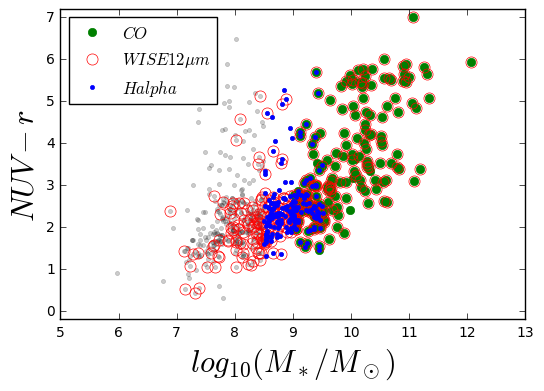

In [51]:
# plot NUV-r vs M_r for filament galaxies
NUVr=nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]
Mr = nsa.ABSMAG[:,4]
x = jmass.MSTAR_50
m22_AB = (wise.W4MPRO + 6.620)
r22 = Mr - (m22_AB - dist_mod)
print dist_mod
plt.figure()
plt.plot(x[halphafilaments],NUVr[halphafilaments],'k.',alpha=.2,label='_nolegend_')
flag = halphafilaments & COsampleflag
plt.plot(x[flag],NUVr[flag],'ko',mfc='g',mec='g',markersize=6,label='$CO$')
flag = halphafilaments & WISEsampleflag
plt.plot(x[flag],NUVr[flag],'ro',mfc='None',mec='r',markersize=8,label='$WISE 12\mu m$')
flag = halphafilaments & Halphasampleflag
plt.plot(x[flag],NUVr[flag],'bo',mfc='b',mec='b',markersize=3,label='$Halpha$')
#plt.scatter(x[allfilaments & wiseflag],NUVr[allfilaments&wiseflag],cmap='jet_r',zorder=20,c=r22[wiseflag&allfilaments])
#plt.colorbar(fraction=.08,label='$r - 22$')
plt.ylim(-.2,7.2)
plt.legend(loc='upper left',numpoints=1)
flag = allfilaments & COflag & ~COdetection
plt.plot(x[flag],NUVr[flag],'gs',markersize=10,mfc='None')
flag = allfilaments & COflag & COdetection
#plt.plot(x[flag],NUVr[flag],'gs',markersize=10,mfc='None',mec='r')
plt.ylabel('$NUV - r$',fontsize=22)
plt.xlabel('$log_{10}(M_*/M_\odot)$',fontsize=22)

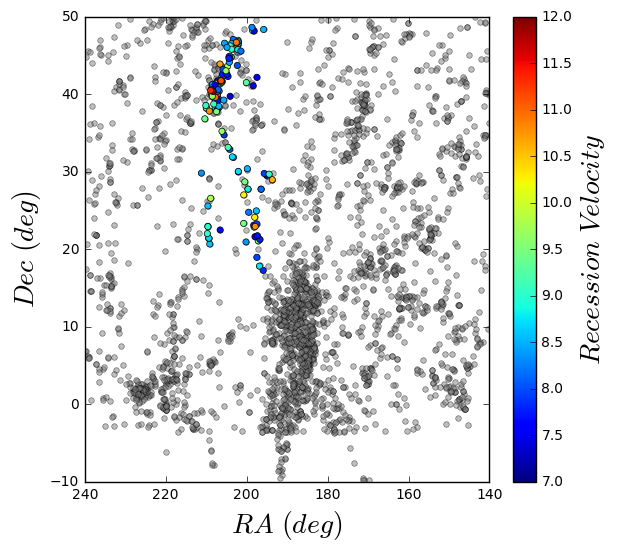

In [29]:
# color coded by stellarmass
filament = (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)

fig=plt.figure(figsize=(6,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.5',markersize=4,alpha=0.5)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=jmass.MSTAR_50[filament],zorder=20,s=20,vmin=7,vmax=12,lw=0.5)

plt.axis([140,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

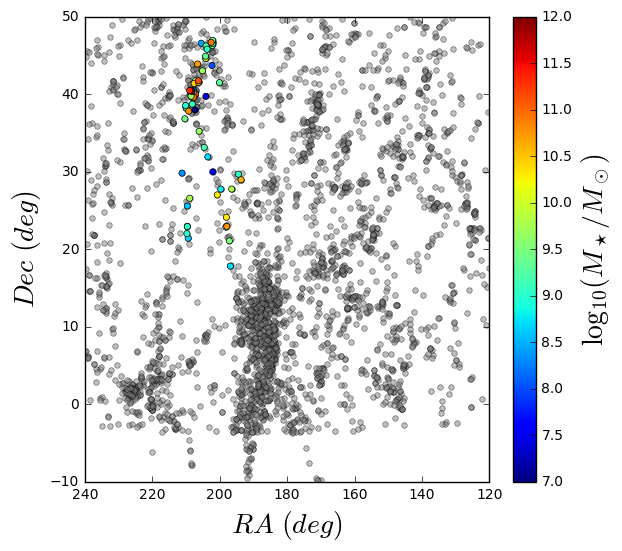

In [145]:
# color coded by WISE 22
 
filament = wiseflag & (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)

fig=plt.figure(figsize=(6,6))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.5',markersize=4,alpha=0.5)
plt.scatter(nsa.RA[filament],nsa.DEC[filament],c=jmass.MSTAR_50[filament],zorder=20,s=20,vmin=7,vmax=12,lw=0.5)

plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$\log_{10}(M_\star/M_\odot )$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)

## Calculate SFR from 22um Flux ##

In [32]:
import sys
sys.path.append("/Users/rfinn/Dropbox/pythonCode/")
import chary_elbaz_24um as chary

Running on Rose's mac pro or laptop
Running on Rose's mac pro or laptop
--------------------------------------------------
Date: Tue Aug  1 16:32:05 2006
User: elbaz
Host: 251-198.ipac.caltech.edu
--------------------------------------------------
Format: 9
Architecture: ppc
Operating System: darwin
IDL Version: 6.1
--------------------------------------------------
Successfully read 14 records of which:
 - 10 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - nulnu_iras25 [<type 'numpy.ndarray'>]
 - nulnuinlsun [<type 'numpy.ndarray'>]
 - nulnu_iras100 [<type 'numpy.ndarray'>]
 - nulnu_iras12 [<type 'numpy.ndarray'>]
 - lir_sanders [<type 'numpy.ndarray'>]
 - nulnu_iras60 [<type 'numpy.ndarray'>]
 - lir [<type 'numpy.ndarray'>]
 - nulnu_lw3 [<type 'numpy.ndarray'>]
 - nulnu_lw2 [<type 'numpy.ndarray'>]
 - lambda [<type 'numpy.ndarray'>]
-----------------------------

**convert magnitude to flux**

$$m_2 - m_1 = 2.5 log (f_2/f_1) $$

Let $m_1$ be the zeropoint with $m_1 = 0$ and $f_1 = 3631$~Jy.  Then 

$$m_2/2.5 = log(f_2/f_1) $$

$$10^{m_2/2.5} = f_2/f _1$$

$$ f_2 = f_1 \times 10^{m_2/2.5} $$

Plugging in 22$\mu$m values gives:

$$ f_{22} = 3631~Jy \times 10^{m_{22-AB}/2.5}$$

From 

http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html


$$F_\nu (Jy) = F_{\nu 0} \times 10^{-m_{Vega}/2.5} $$

where $F_{\nu_0} = 8.363$ for W4.

In [100]:
# get conversion for f22_Jy to Lir and SFR for a source with f22 = 1 micro-Jy
LIR_conv,SFR22_conv = chary.chary_elbaz_24um(virgo_redshift,1.)
print LIR,SFR22

[ 9444.92089844] [  3.75873845e+05   1.26427662e+05   1.08603071e+05 ...,   2.48337387e+05
   5.12202987e+08   1.75485851e+05]


In [101]:
# flux ZP of AB system is 3631 Jy
m22_AB = (wise.W4MPRO + 6.620)
f22 = 3631.*10.**(-1.*m22_AB/2.5)
f22_Jy = 8.363 * 10.**(-1.*wise.W4MPRO/2.5)

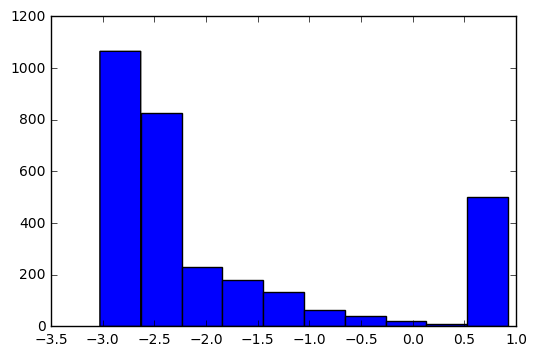

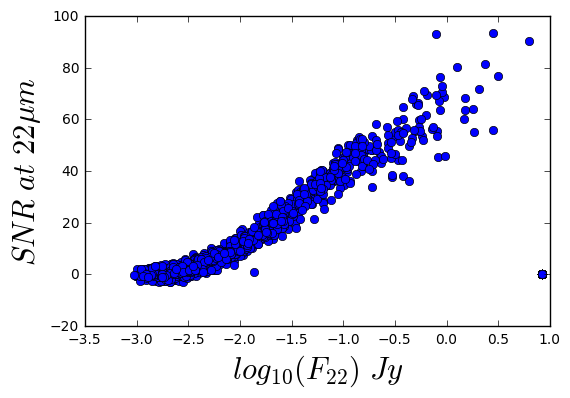

In [129]:
plt.figure()
plt.hist(np.log10(f22_Jy[vflag]))
plt.figure()
plt.plot(np.log10(f22_Jy[vflag]),wise.W4SNR[vflag],'bo')
#plt.xlabel('$log_{10} F_\nu(22) ~ (Jy)$',fontsize=22)
plt.xlabel('$log_{10} (F_{22}) \ Jy$',fontsize=22)
plt.ylabel('$SNR \ at \ 22 \mu m$',fontsize=22)

In [102]:
SFR22 = f22_Jy * 1.e6 * SFR22_conv[0]

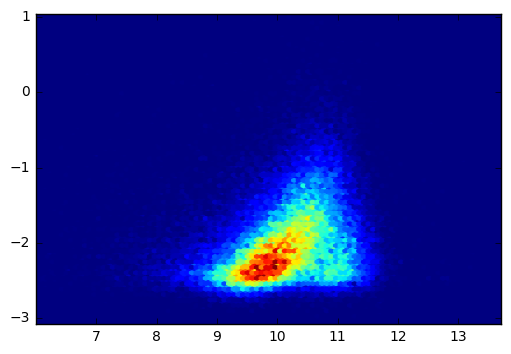

In [103]:
# SFR vs Stellar mass
plt.figure()
#plt.plot(jmass.MSTAR_50[wiseflag],SFR22[wiseflag],'k.')
flag = wiseflag & (jmass.MSTAR_50 < 14) & (jmass.MSTAR_50 > 6)
plt.hexbin(jmass.MSTAR_50[flag],np.log10(SFR22[flag]),gridsize=100)
#plt.axis([7,11,0,10])
#plt.gca().set_yscale('log')
#plt.axis([7,11,.003,500])
#plt.xlim(6,13)

(array([  5.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          4.60000000e+01,   1.77000000e+02,   4.27000000e+02,
          1.04800000e+03,   2.64300000e+03,   4.99400000e+03,
          8.31100000e+03,   1.25350000e+04,   1.38360000e+04,
          1.27830000e+04,   1.20700000e+04,   1.07770000e+04,
          8.97300000e+03,   6.53600000e+03,   4.74400000e+03,
          3.85700000e+03,   3.38900000e+03,   2.92200000e+03,
          2.72900000e+03,   2.42400000e+03,   2.11900000e+03,
          2.01600000e+03,   1.89900000e+03,   1.71700000e+03,
          1.62300000e+03,   1.46400000e+03,   1.24600000e+03,
          1.27400000e+03,   1.07900000e+03,   9.41000000e+02,
          9.41000000e+02,   7.91000000e+02,   7.58000000e+02,
          7.24000000e+02,   6.27000000e+02,   5.70000000e+02,
          4.68000000e+02,   3.74000000e+02,   3.49000000e+02,
          3.58000000e+02,   2.61000000e+02,   2.57000000e+02,
          1.93000000e+02,   1.59000000e+02,   1.57000000e+02,
        

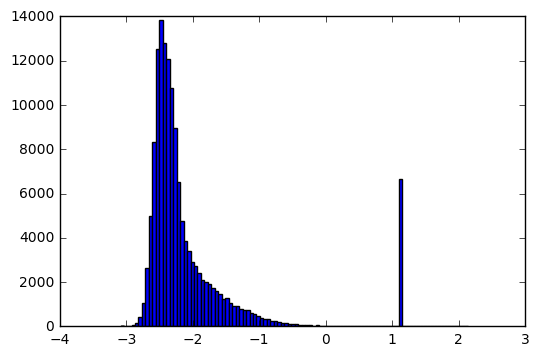

In [104]:
plt.figure()
plt.hist(np.log10(SFR22),bins=100)

In [75]:
SFR22

array([  9.97970981e-03,   3.35674162e-03,   2.88348644e-03, ...,
         6.59352888e-03,   1.35993425e+01,   4.65927038e-03])

In [146]:
sum(vflag & wiseflag)

1206

In [147]:
sum(vflag)

3342

In [153]:
help(plt.arrow)

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, hold=None, **kwargs)
    Add an arrow to the axes.
    
    Call signature::
    
       arrow(x, y, dx, dy, **kwargs)
    
    Draws arrow on specified axis from (*x*, *y*) to (*x* + *dx*,
    *y* + *dy*). Uses FancyArrow patch to construct the arrow.
    
    The resulting arrow is affected by the axes aspect ratio and limits.
    This may produce an arrow whose head is not square with its stem. To
    create an arrow whose head is square with its stem, use
    :meth:`annotate` for example::
    
        ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
    
    Optional kwargs control the arrow construction and properties:
    
    Constructor arguments
      *width*: float (default: 0.001)
        width of full arrow tail
    
      *length_includes_head*: [True | False] (default: False)
        True if head is to be counted in calculating the length.
    
      *head_

Help on method annotate in module matplotlib.axes._axes:

annotate(self, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point ``xy`` with text ``s``.
    
    Additional kwargs are passed to `~matplotlib.text.Text`.
    
    Parameters
    ----------
    
    s : str
        The text of the annotation
    
    xy : iterable
        Length 2 sequence specifying the *(x,y)* point to annotate
    
    xytext : iterable, optional
        Length 2 sequence specifying the *(x,y)* to place the text
        at.  If None, defaults to ``xy``.
    
    xycoords : str, Artist, Transform, callable or tuple, optional
    
        The coordinate system that ``xy`` is given in.
    
        For a `str` the allowed values are:
    
        =================   ===============================================
        Property            Description
        =================   ===============================================
        'figure points'     points from

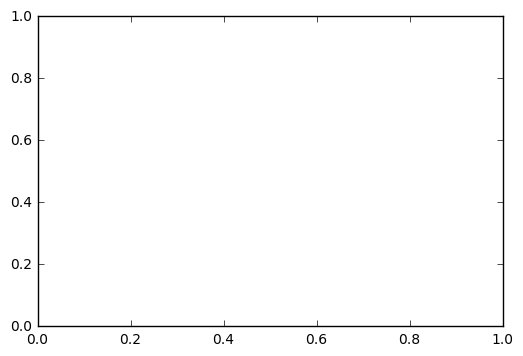

In [162]:
help(plt.gca().annotate)

In [219]:
8./30

0.26666666666666666

In [233]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo